In [1]:
import logging

import torch
import torch.nn as nn
import torch.optim as optim
from torch_lr_finder import LRFinder

import arg
import lib
import nets
from main import get_model


In [2]:
torch.backends.cudnn.benchmark = True
args = vars(arg.get_params())
model = get_model(args)
DATA_DIR = "/mnt/ramdisk/417/ap"
dataloaders = lib.get_dataloaders(args, 1, 10, 2, DATA_DIR)
logger = logging.getLogger()
#classes_weights=lib.weights_calc(dataloaders["train"], logger)
#pos_weight = classes_weights[0]/classes_weights[1]
#criterion = nn.BCEWithLogitsLoss(pos_weight.to("cuda"))
criterion = nn.CrossEntropyLoss(weight=lib.weights_calc(dataloaders["train"], logger).to("cuda"))
optimizer = optim.SGD(model.parameters(), lr=1e-7, weight_decay=1e-4)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(
    dataloaders["train"],
    dataloaders["val"],
    start_lr=1e-7,
    end_lr=1,
    num_iter=100,
    step_mode="exp",
)

[2021-01-20 21:39:42] INFO (root/MainThread) H    :61546
[2021-01-20 21:39:42] INFO (root/MainThread) MI   :25687
[2021-01-20 21:39:42] INFO (root/MainThread) weights:[1.411071538925171, 0.5889285206794739]


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 1.45E-02


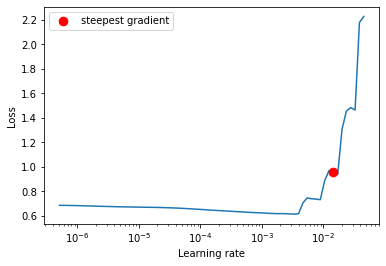

In [3]:
#417
lr_finder.plot()  # 
lr_finder.reset()  # 
1e-5
2e-3

LR suggestion: steepest gradient
Suggested LR: 8.70E-02


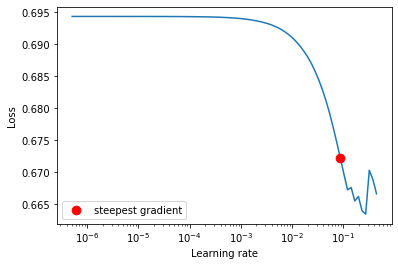

In [3]:
#414ALEX
lr_finder.plot()  # 
lr_finder.reset()  # 

LR suggestion: steepest gradient
Suggested LR: 5.46E-03


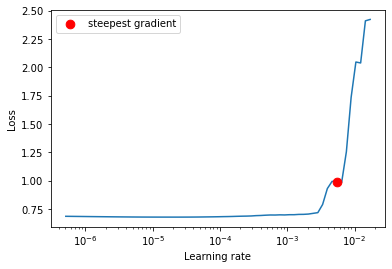

0.003

In [4]:
#503
lr_finder.plot()  # 
lr_finder.reset()  # 
1e-4
3e-3

LR suggestion: steepest gradient
Suggested LR: 2.10E-04


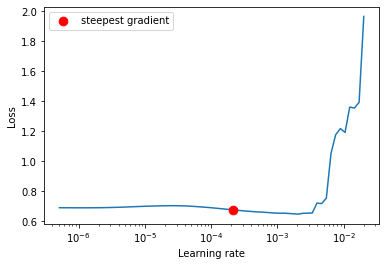

0.01

In [5]:
#413
lr_finder.plot()  # 
lr_finder.reset()  # 
1e-4
3e-3

LR suggestion: steepest gradient
Suggested LR: 2.78E-02


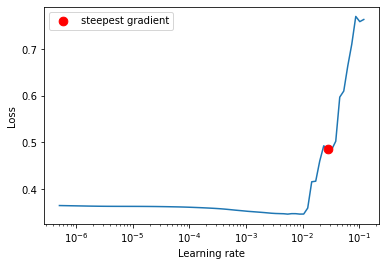

0.002

In [4]:
lr_finder = torch.load("502.lr")
lr_finder.plot()  # 502_BCE
lr_finder.reset()  # 
1e-4
1e-2

LR suggestion: steepest gradient
Suggested LR: 2.01E-02


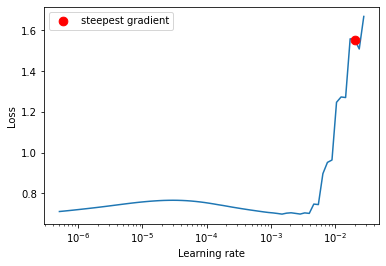

0.007

In [4]:
lr_finder.plot()  # 502
lr_finder.reset()  # 
2e-5
2e-3

LR suggestion: steepest gradient
Suggested LR: 7.39E-02


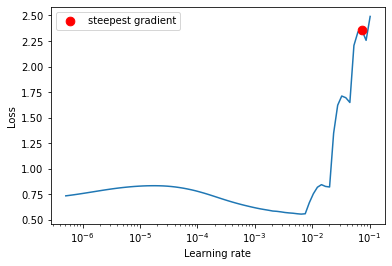

In [4]:
lr_finder.plot()  # 315
lr_finder.reset()  # 
5e-5
7e-3

LR suggestion: steepest gradient
Suggested LR: 7.39E-02


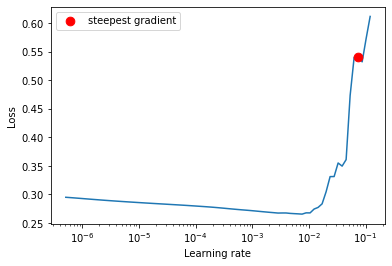

0.005

In [5]:
lr_finder = torch.load("408.lr")
lr_finder.plot()  # to inspect the loss-learning rate graph
lr_finder.reset()  # 
1E-4
7E-2

LR suggestion: steepest gradient
Suggested LR: 2.78E-02


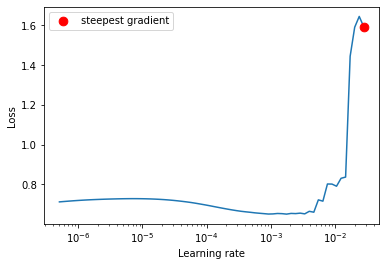

0.02

In [4]:
lr_finder = torch.load("412_2.lr")
lr_finder.plot()  # to inspect the loss-learning rate graph
lr_finder.reset()  # to reset the model and optimizer to their initial state
5E-4
1E-2

LR suggestion: steepest gradient
Suggested LR: 2.48E-04


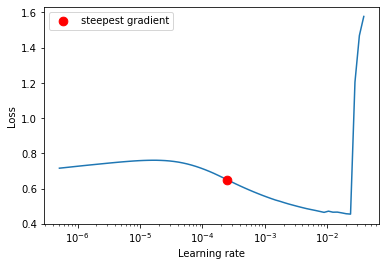

0.02

In [3]:
lr_finder = torch.load("314+2.lr")
lr_finder.plot()  # to inspect the loss-learning rate graph
lr_finder.reset()  # to reset the model and optimizer to their initial 
5E-5
2E-2